# Predicting Online Credit Card Applications (Digital Advertising)
*Final Project #3: Exploratory Data Analysis*
<br>*Jan 28, 2017*

## I. Import Packages and Data

In [191]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Set the global default size of matplotlib figures to 10 inches wide by 5 inches tall
#plt.style.use('ggplot')
#import numpy as np
#import os

In [2]:
data = pd.read_csv('../data/DATA_FOR_MODEL_20perc.csv', sep=',')
data.head()

,User_ID,Impressions,TimeDiff_Minutes,TimeDiff_Minutes_AVG,Funnel_Upper_Imp,Funnel_Middle_Imp,Funnel_Lower_Imp,Campaign_Message_Travel_Imp,Campaign_Message_Service_Imp,Campaign_Message_Family_Travel_Imp,...,Creative_Size_320x480_Imp,Creative_Size_Uknown_Imp,Device_Desktop_Imp,Device_Other_Imp,Device_Mobile_Imp,Active_View_Eligible_Impressions,Active_View_Measurable_Impressions,Active_View_Viewable_Impressions,Clicks,Conversions
0,AMsySZYlP3l94iys9P9WaBXIWE6B,3,2.0,1.00,0,3,0,0,3,0,...,0,0,0,0,3,0,0,0,NaN,NaN
1,AMsySZbdCy7kK0BqCq38AvgzDJ7y,3,1.0,0.50,0,3,0,3,0,0,...,0,0,3,0,0,3,3,1,NaN,NaN
2,AMsySZbsx0jjk_iOfpRCVx2ss3v8,2,12.0,12.00,0,2,0,0,0,0,...,0,0,2,0,0,2,2,1,NaN,NaN
3,AMsySZZnAR-zSA0aCGVZkfhupUhU,5,23033.0,5758.25,0,5,0,0,0,0,...,0,0,0,0,5,5,5,5,NaN,NaN
4,AMsySZb1yHw6ewPTnb7h39vBdCh8,2,188.0,188.00,0,2,0,0,0,0,...,0,0,2,0,0,2,2,1,NaN,NaN


## II. Dataset Description
*Update from Final Project #2 since the data was manipulated to this format in SQL*
* **Time frame:** Nov 8-Dec 31, 2016
* **Scope:**
    * Canada
    * All of the client's campaigns and strategies 
    * Only ads served via DoubleClick Bid Manager (DBM)
* **Observations at User-level:** The original datasets are at the event-level, e.g. each ad impression.  For this exploratory data analysis, we have already used the **user_id** dimension to collapse the datasets so we have a row for each user.  Therefore, each row of data summarizes the ad exposure for each user during the time period.

Field|Data Type|Type of Variable|Description
---|---|---|---
User_ID|String|N/A|Unique Identified for each user
Impressions|Integer|Continuous|Total of ads shown to the user
TimeDiff_Minutes|Float|Continuous|Total time in minutes between first and last impression, Null if only one impression
TimeDiff_Minutes_AVG|Float|Continuous|Average time in minutes between ad impresions, Null if only one impression
Funnel_Upper_Imp|Integer|Continuous|Total impressions from Upper Funnel campaigns
Funnel_Middle_Imp|Integer|Continuous|Total impressions from Middle Funnel campaigns
Funnel_Lower_Imp|Integer|Continuous|Total impressions from Lower Funnel campaigns
Campaign_Message_Travel_Imp|Integer|Continuous|Total impressions from ads with a "Travel" message
Campaign_Message_Service_Imp|Integer|Continuous|Total impressions from ads with a "Service" message
Campaign_Message_Family_Travel_Imp|Integer|Continuous|Total impressions from ads with a "Family Travel" message
Campaign_Card_Cash_Rewards_Imp|Integer|Continuous|Total impressions from ads with a "Cash Rewards" message
Campaign_Card_Premium_Rewards_Imp|Integer|Continuous|Total impressions from ads with a "Premium Rewards" message
Campaign_Card_Other_Imp|Integer|Continuous|Total impressions from ads with a "Other Card" message
Creative_Type_Display_Imp|Integer|Continuous|Total impressions from creative type "Display"
Creative_Type_TrueView_Imp|Integer|Continuous|Total impressions from creative type "TrueView"
Creative_Type_RichMediaExpanding_Imp|Integer|Continuous|Total impressions from creative type "Rich Media Expanding"
Creative_Type_RichMedia_Imp|Integer|Continuous|Total impressions from creative type "Rich Media Display"
Creative_Size_728x90_Imp|Integer|Continuous|Total impressions from creative size 728x90
Creative_Size_300x600_Imp|Integer|Continuous|Total impressions from creative size 300x600
Creative_Size_300x250_Imp|Integer|Continuous|Total impressions from creative size 300x250
Creative_Size_160x600_Imp|Integer|Continuous|Total impressions from creative size 160x600
Creative_Size_468x60_Imp|Integer|Continuous|Total impressions from creative size 468x60
Creative_Size_300x50_Imp|Integer|Continuous|Total impressions from creative size 300x50
Creative_Size_320x50_Imp|Integer|Continuous|Total impressions from creative size 320x50
Creative_Size_320x420_Imp|Integer|Continuous|Total impressions from creative size 320x420
Creative_Size_480x320_Imp|Integer|Continuous|Total impressions from creative size 480x320
Creative_Size_320x480_Imp|Integer|Continuous|Total impressions from creative size 320x480
Creative_Size_Uknown_Imp|Integer|Continuous|Total impressions from unknown creative size
Device_Desktop_Imp|Integer|Continuous|Total impressions from desktops
Device_Other_Imp|Integer|Continuous|Total impressions from mobile devices
Device_Mobile_Imp|Integer|Continuous|Total impressions from other devices (e.g. gaming consoles)
Active_View_Eligible_Impressions|Integer|Continuous|Total impressions that were eligible for viewability measurement
Active_View_Measurable_Impressions|Integer|Continuous|Total impressions that were measureable
Active_View_Viewable_Impressions|Integer|Continuous|Total impressions that viewable
Clicks|Float|Continuous|Total ad clicks
Conversions|Float|Continuous|Total conversions, i.e. online credit card applications

## III. Data Cleaning & New Columns

### A. Handle missing data

In [3]:
# Find columns with null values
data.isnull().sum().sort_values(ascending=False)

Conversions                             3036278
Clicks                                  2978667
TimeDiff_Minutes                        1313000
TimeDiff_Minutes_AVG                    1313000
Campaign_Card_Cash_Rewards_Imp                0
Creative_Type_RichMediaExpanding_Imp          0
Creative_Type_TrueView_Imp                    0
Creative_Type_Display_Imp                     0
Campaign_Card_Other_Imp                       0
Campaign_Card_Premium_Rewards_Imp             0
Campaign_Message_Service_Imp                  0
Campaign_Message_Family_Travel_Imp            0
Campaign_Message_Travel_Imp                   0
Funnel_Lower_Imp                              0
Funnel_Middle_Imp                             0
Funnel_Upper_Imp                              0
Impressions                                   0
Creative_Type_RichMedia_Imp                   0
Creative_Size_728x90_Imp                      0
Creative_Size_300x600_Imp                     0
Creative_Size_Uknown_Imp                

* **For Clicks and Conversions:** convert NULL values to zero
* **For TimeDiff_Minutes and TimeDiff_Minutes_AVG:** leave as is for now since it is null when there was only one ad impression. To input into a model, we could possible change this to the mean values, but for exploratory analysis we will leave as NULL.

In [4]:
# For Clicks,Conversion, convert NULL values to zero
data['Clicks'].fillna(value=0,inplace=True)
data['Conversions'].fillna(value=0,inplace=True)

In [5]:
data[['Clicks','Conversions','TimeDiff_Minutes','TimeDiff_Minutes_AVG']].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036639 entries, 0 to 3036638
Data columns (total 4 columns):
Clicks                  3036639 non-null float64
Conversions             3036639 non-null float64
TimeDiff_Minutes        1723639 non-null float64
TimeDiff_Minutes_AVG    1723639 non-null float64
dtypes: float64(4)
memory usage: 92.7 MB


### B. Create Class Variable we will Predict

Create a new categorical variable **Converted**, which will be 1 if the the user converted at least once, and zero if the user did not convert.

In [6]:
data['Converted'] = pd.Categorical([1 if x>0 else 0 for x in data['Conversions']])
data['Converted'].value_counts()

0    3036278
1        361
Name: Converted, dtype: int64

### C. Convert time features from Minutes to Hours and Days

In [202]:
data['TimeDiff_Hours'] = data['TimeDiff_Minutes']/60
data['TimeDiff_Hours_AVG'] = data['TimeDiff_Minutes_AVG']/60

data['TimeDiff_Days'] = data['TimeDiff_Minutes']/60/24
data['TimeDiff_Days_AVG'] = data['TimeDiff_Minutes_AVG']/60/24

In [215]:
data[['TimeDiff_Minutes','TimeDiff_Hours','TimeDiff_Days']].sample(5)

,TimeDiff_Minutes,TimeDiff_Hours,TimeDiff_Days
2731794,3.0,0.05,0.002083
1393999,NaN,NaN,NaN
1872718,1581.0,26.35,1.097917
2462880,NaN,NaN,NaN
153765,0.0,0.00,0.000000


In [217]:
data[['TimeDiff_Minutes_AVG','TimeDiff_Hours_AVG','TimeDiff_Days_AVG']].sample(5)

,TimeDiff_Minutes_AVG,TimeDiff_Hours_AVG,TimeDiff_Days_AVG
866149,NaN,NaN,NaN
2534528,3.000000,0.050000,0.002083
2182309,NaN,NaN,NaN
2391297,3043.888889,50.731481,2.113812
3007419,2885.571429,48.092857,2.003869


## IV. Analysis

In [7]:
#Define function for graphing distribution
#Define function for graphing boxplots

### A. Table Summary

In [8]:
#Observations (i.e. number of users)
data.shape

(3036639, 37)

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Impressions,3036639.0,4.895185,16.007951,1.0,1.0,2.0,3.0,5600.0
TimeDiff_Minutes,1723639.0,11500.443955,17081.564854,0.0,4.0,1481.0,18270.0,76528.0
TimeDiff_Minutes_AVG,1723639.0,2872.849551,6229.652206,0.0,2.0,416.0,2910.0,76164.0
Funnel_Upper_Imp,3036639.0,0.697226,3.598055,0.0,0.0,0.0,0.0,279.0
Funnel_Middle_Imp,3036639.0,2.824682,6.536556,0.0,1.0,1.0,3.0,2126.0
Funnel_Lower_Imp,3036639.0,1.373277,13.176749,0.0,0.0,0.0,0.0,5600.0
Campaign_Message_Travel_Imp,3036639.0,1.027747,7.017979,0.0,0.0,0.0,0.0,2454.0
Campaign_Message_Service_Imp,3036639.0,1.302376,8.466440,0.0,0.0,0.0,0.0,3429.0
Campaign_Message_Family_Travel_Imp,3036639.0,0.453913,2.628486,0.0,0.0,0.0,0.0,477.0
Campaign_Card_Cash_Rewards_Imp,3036639.0,1.133945,6.950091,0.0,0.0,0.0,1.0,4373.0


In [10]:
# Get intuition for total users, total impressions, total clicks, total conversions
print 'Total Users:',data['User_ID'].count()
print 'Total Impressions:',data['Impressions'].sum()
print 'Average Frequency:',float(data['Impressions'].sum())/data['User_ID'].count()
print ''
print 'Total Clicks:',data['Clicks'].sum()
print 'Total Conversions:',data['Conversions'].sum()
print 'Conversions per User:',float(data['Conversions'].sum())/data['User_ID'].count()*100,"%"

Total Users: 3036639
Total Impressions: 14864911
Average Frequency: 4.89518543363

Total Clicks: 93798.0
Total Conversions: 399.0
Conversions per User: 0.0131395269573 %


### B. Define Chart/Analysis Functions

In [231]:
def plot_histograms(data,feature,max_value,bins,alpha):
    #Plot histograms together
    plt.figure(1, figsize=(12, 4))
    
    plt.hist(data.loc[(data["Converted"]==1) & (data[feature]<=max_value),feature],
             bins=bins,
             alpha=alpha,
             normed=True,
             label="Converted=1")
    
    plt.hist(data.loc[(data["Converted"]==0) & (data[feature]<=max_value),feature],
             bins=bins,
             alpha=alpha,
             normed=True,
             label="Convert=0")
    
    plt.legend()
    plt.title("Histogram of {} (Max Plotted:{})".format(feature,max_value))
    plt.xlabel(feature)
    plt.ylabel('Normalized Frequency')

In [159]:
def likelihood_to_convert(data,feature,max_value,alpha):
    #Calculate percent of converted users by values of feature
    groupby = data.groupby([feature,'Converted'])['Converted'].count()
    not_converted = groupby.loc[:,0]
    converted = groupby.loc[:,1]
    percent_converted = converted / (not_converted+converted) * 100
    
    temp=pd.concat([converted,not_converted,percent_converted],axis=1)
    temp.columns=['Coverted','Not_Converted','Percent_Converted']
    temp.fillna(0,inplace=True)
    
    #Plot Scatter of percent converted users vs values of feature on x-axis
    plt.figure(1, figsize=(12, 4))
    
    #Full Graph
    plt.subplot(1,2,1)
    plt.scatter(temp.index,temp['Percent_Converted'],alpha=alpha)
    
    plt.title("Likelihood to Covert by {} (All Values)".format(feature))
    plt.xlabel(feature)
    plt.ylabel('Percent Users Converted')
    
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    
    #Full Graph
    plt.subplot(1,2,2)
    plt.scatter(temp.index[temp.index<max_value],
                temp.loc[temp.index<max_value,'Percent_Converted'],
                alpha=0.7)
    
    plt.title("Likelihood to Covert by {} (Max Plotted:{})".format(feature,max_value))
    plt.xlabel(feature)
    plt.ylabel('Percent Users Converted')
    
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)

In [196]:
def feature_range(data,feature):
    print feature
    print data.pivot_table(values='Impressions', index=['Converted'], aggfunc=[np.min,np.max])

### C. Impressions

In [197]:
feature_range(data,'Impression')

Impression
           amin  amax
Converted            
0             1  5600
1             1   577


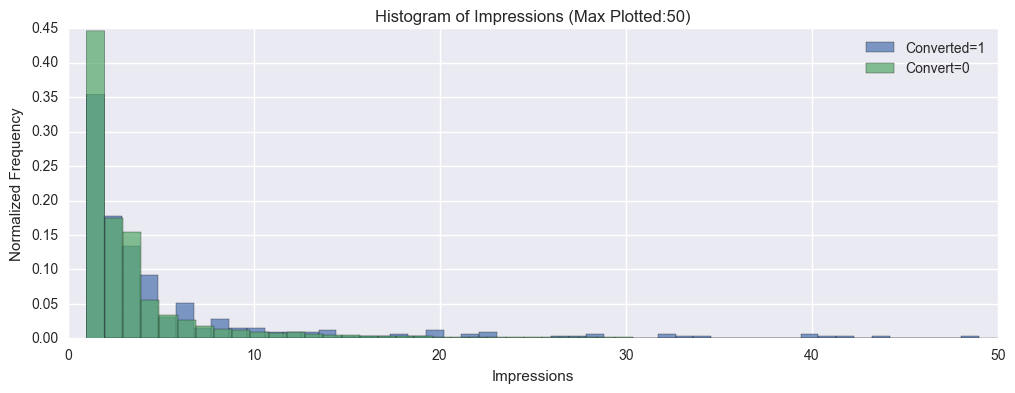

In [232]:
plot_histograms(data=data,feature='Impressions',max_value=50,bins=50,alpha=.7)

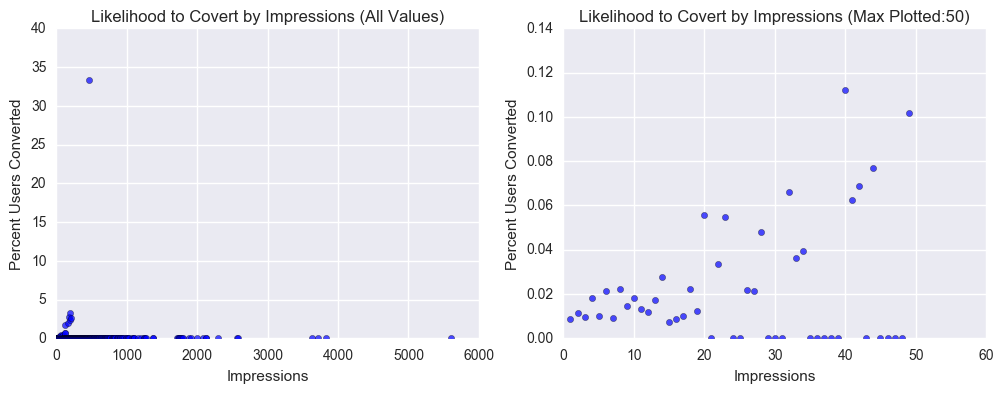

In [219]:
likelihood_to_convert(data=data,feature='Impressions',max_value=50,alpha=0.7)

### D. Time difference between ads

**Note: ** Charts below ignore NULL values (i.e. when user only received one impression)

#### Hours

In [ ]:
d

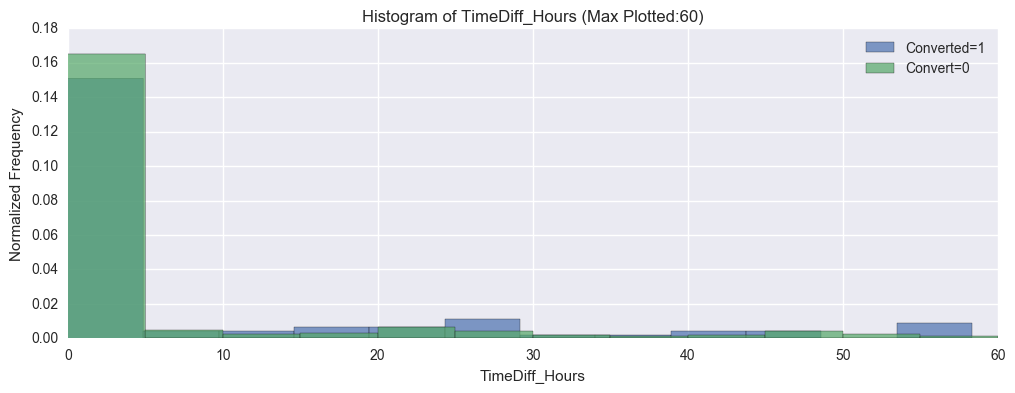

In [235]:
#Minutes
plot_histograms(data=data,feature='TimeDiff_Hours',max_value=60,bins=12,alpha=.7)